In [8]:
from dotenv import load_dotenv
import os
from pathlib import Path
import pickle

In [12]:
load_dotenv()
model_name="google/vit-base-patch16-224"
model_prefix = model_name.replace('/', '_')
embedding_cache_dir = os.environ.get('TRANSF_EMBEDDING_PATH', 'embeddings_cache')
embeddings_file = Path(embedding_cache_dir) / f"{model_prefix}_embeddings_softmax.pkl"
with open(embeddings_file, 'rb') as f:
    all_stim_embeddings = pickle.load(f)

embeddings=all_stim_embeddings['natural_scenes']


In [14]:
embeddings.shape

(118, 1000)

In [15]:
from skbio.stats.composition import clr

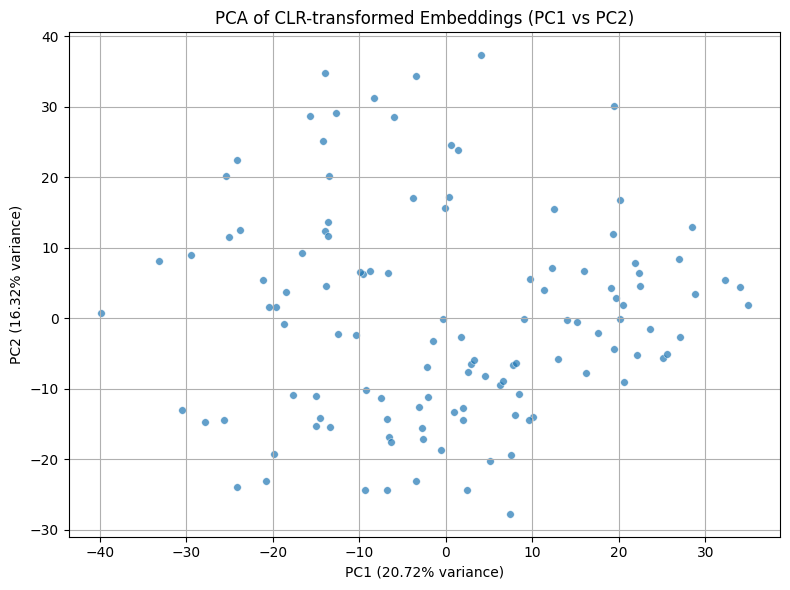

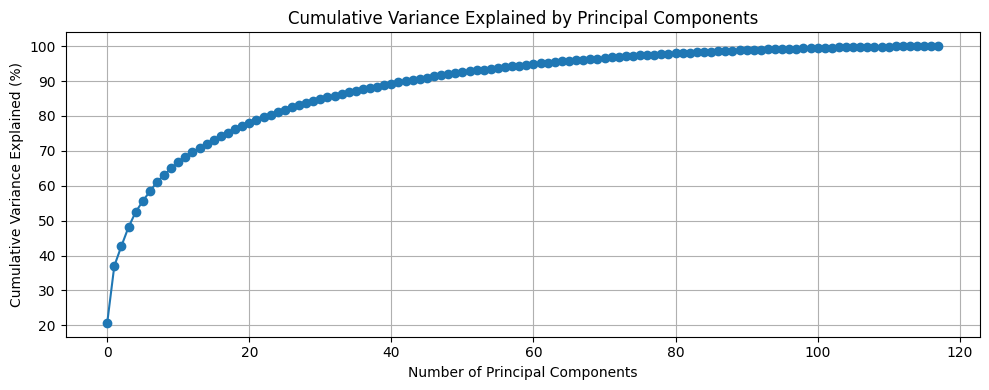

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Convert to numpy if torch tensor
if 'torch' in str(type(embeddings)):
    embeddings = embeddings.cpu().numpy()

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(clr(embeddings))
explained_var = pca.explained_variance_ratio_

# ─────────────────────────────────────────────────────────────
# Plot: First Two Principal Components
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=30, alpha=0.7)
plt.title('PCA of CLR-transformed Embeddings (PC1 vs PC2)')
plt.xlabel(f'PC1 ({explained_var[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.2f}% variance)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────
# Plot: Variance Explained by Each Component
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(explained_var)*100, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



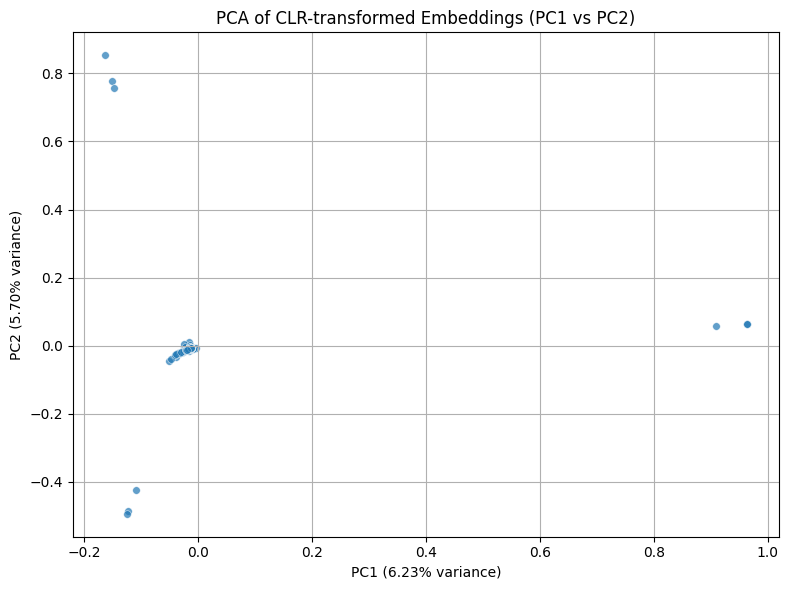

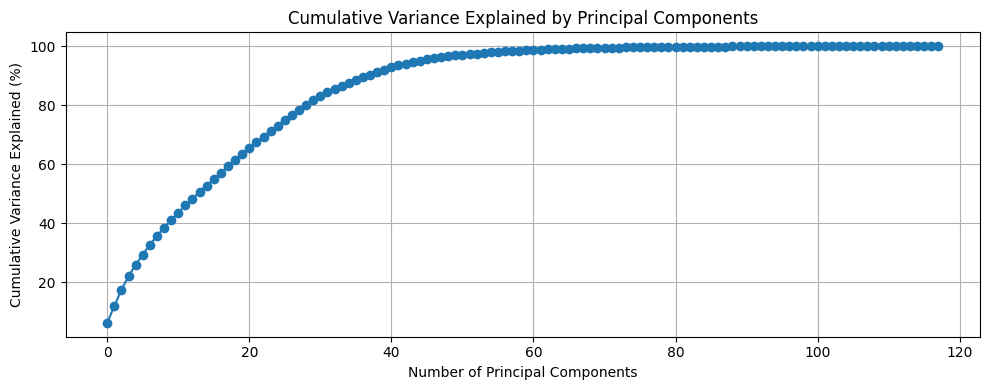

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Convert to numpy if torch tensor
if 'torch' in str(type(embeddings)):
    embeddings = embeddings.cpu().numpy()

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(embeddings)
explained_var = pca.explained_variance_ratio_

# ─────────────────────────────────────────────────────────────
# Plot: First Two Principal Components
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=30, alpha=0.7)
plt.title('PCA of CLR-transformed Embeddings (PC1 vs PC2)')
plt.xlabel(f'PC1 ({explained_var[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.2f}% variance)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────
# Plot: Variance Explained by Each Component
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(explained_var)*100, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [10]:
all_stim_embeddings

{'natural_movie_one': array([[4.47546381e-06, 4.75147681e-05, 3.04749192e-05, ...,
         1.07993355e-05, 2.85578008e-05, 5.43358852e-04],
        [6.12010217e-06, 1.81274881e-05, 6.73237228e-05, ...,
         1.35577629e-05, 3.27791240e-05, 1.80008865e-04],
        [6.08158462e-06, 1.72731852e-05, 6.04526795e-05, ...,
         1.22795054e-05, 3.41223604e-05, 1.87222962e-04],
        ...,
        [8.71892335e-05, 1.07425156e-04, 1.85369543e-04, ...,
         3.78508703e-05, 1.46083708e-04, 6.07196183e-04],
        [3.42533240e-05, 5.82542561e-05, 1.03720122e-04, ...,
         1.85166318e-05, 4.95846543e-05, 7.22153287e-04],
        [2.19563026e-05, 4.37823255e-05, 5.98229708e-05, ...,
         9.72398357e-06, 7.13589106e-05, 1.24783255e-03]], dtype=float32),
 'natural_movie_two': array([[6.29927163e-05, 6.76256095e-05, 1.63223493e-04, ...,
         2.08098008e-05, 2.05639968e-04, 9.21392988e-04],
        [8.78608844e-05, 1.14559312e-04, 1.55895774e-04, ...,
         2.11403531e-05, 1